#### The Divergent Roles of Decision Trees in Classification and Regression
Decision trees serve different purposes in classification and regression tasks:

Classification:
Used to predict the category or class of a data point.
Splits data based on features, creating decision rules in a tree structure.
Leaf nodes represent class labels.
Output: Discrete class labels.

Regression:
Used to predict continuous numeric values.
Splits data to minimize variance in predicted values.
Leaf nodes contain numeric predictions.
Output: Continuous numeric predictions.

Key Differences:
Output Type: Classification trees produce discrete class labels, while regression trees provide continuous numeric predictions.

Objective: Classification divides data into classes, regression predicts numeric values.

Leaf Values: Classification tree leaves hold class labels; regression tree leaves contain numeric predictions.

Evaluation: Classification uses metrics like Gini impurity, regression uses MSE.

Example: Classification tree classifies emails as "Spam" or "Not Spam," regression tree predicts house prices.

In summary, decision trees adapt to either task but vary in structure and output to suit specific needs.

##### A decision tree predicts by:

1.Starting at the root node.

2.Comparing features at each node.

3.Branching based on feature values.

4.Traversing nodes until a leaf is reached.

5.Leaf provides prediction: class or value.

6.Decision trees are interpretable and capture complex decisions.

A decision tree uses a sequence of feature comparisons and binary decisions to guide the traversal of the tree until it reaches a leaf node, which provides the prediction for the new data point. This prediction process is intuitive and interpretable, as each step corresponds to a decision based on a feature's value. Decision trees are versatile and widely used in machine learning due to their transparency and ability to capture complex decision-making processes.

#### Optimizing Margin: The Core Criterion of SVMs
SVMs optimize the "Margin," which is the distance between the decision boundary and the nearest data points from each class. The objective is to find the hyperplane that maximizes this margin while accurately classifying the training data. This margin maximization criterion ensures robust decision boundaries for effective classification.

#### SVMs and the Kernel Trick: Taming Non-Linear Data
Support Vector Machines (SVMs) excel in classifying data but are initially designed for linearly separable data. In real-world scenarios where data isn't linearly separable, SVMs utilize the "kernel trick" to transform data into a higher-dimensional space, enhancing separability. 

##### Kernel Trick: A mathematical transformation maps data to a higher-dimensional space, increasing the likelihood of linear separation without explicitly storing the transformed data.

##### Common Kernels: SVMs offer various kernels like linear, radial basis function (RBF), polynomial, and sigmoid. You choose based on the problem's nature.

##### Kernel Parameters: Parameters like 'C' and 'gamma' in some kernels control model complexity and overfitting, impacting SVM performance.

SVMs adapt to non-linear data using the kernel trick, enabling complex decision boundaries that capture intricate patterns. The choice of kernel and parameter tuning are pivotal for modeling non-linear relationships effectively.

#### Extending SVMs for Multi-Class Classification: Strategies and Techniques
SVMs can handle multi-class classification by:
##### One-vs-Rest (OvR):
Creating multiple binary classifiers, one for each class, and selecting the class with the highest confidence during prediction.
##### One-vs-One (OvO): 
Building a binary classifier for every pair of classes and using voting to decide the final class.
##### Direct Multi-Class SVM:
Optimizing the multi-class problem directly without breaking it into binary subproblems.
##### SVM-Softmax:
Combining SVM with a Softmax layer to convert decision scores into class probabilities.
##### Tree-Based SVM:
Using tree-based methods to naturally handle multi-class classification by recursively splitting data.

The choice depends on factors like the number of classes and computational resources. OvR and OvO are popular for simplicity, but experimentation helps select the best approach.

#### Breast Cancer (BC): A Global Health Challenge

Breast cancer (BC) ranks among the most prevalent forms of cancer in women worldwide, contributing significantly to both the number of new cancer cases and cancer-related fatalities on a global scale. This disease poses a substantial public health concern in contemporary society.

Insights into the BC Dataset

Our dataset featured 32 attributes.
Attributes in Our Dataset

Our dataset encompasses a range of crucial attributes, each providing valuable insights into breast cancer characteristics:

Radius: The mean distance from the center to points on the tumor's perimeter.<br>
Texture: The standard deviation of gray-scale values within the image.<br>
Perimeter: The size of the core tumor.<br>
Area: The overall area of the tumor.<br>
Smoothness: Local variations in radius lengths, reflecting irregularities in cell size.<br>
Compactness: Calculated as (perimeter² / area) - 1.0, capturing the tumor's shape and density.<br>
Concavity: Reflects the severity of concave regions in the tumor contour.<br>
Concave Points: Indicates the number of concave portions within the contour.<br>
Symmetry: Measures the symmetry of cell nuclei.<br>
Fractal Dimension: Derived from a "coastline approximation," characterizing complexity.


Understanding Our Target Categories
Our target file encompasses two distinct categories, denoted by the following labels:<br>
Malignant: Referring to cancerous tumors.<br>
Benign: Signifying non-cancerous tumors.<br>

These categories are pivotal in our mission to develop models for breast cancer diagnosis and prognosis, contributing to the broader efforts aimed at addressing this global health challenge.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

cancer_data=load_breast_cancer()
#cancer_data

In [4]:
import pandas as pd
cancer_df=pd.DataFrame(data=cancer_data.data,
                    columns=cancer_data.feature_names)

In [61]:
cancer_data.feature_names #Coloumn names 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer_df #breast_cancer 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
cancer_data_target = pd.DataFrame(cancer_data.target)
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In the cancer dataset, the target values serve a crucial role in distinguishing between malignancy and benign (non-malignancy), value of '0' represents cases of malignant tumors, while a value of '1' is indicative of non-malignant tumors.

In [7]:
cancer_df.shape

(569, 30)

In [8]:
cancer_data_target.shape

(569, 1)

##### In the context of cancer data analysis there are 569 samples or instances and 31 features or attributes associated with each sample including one features as our target variable 

In [9]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
missing = cancer_df.isnull().sum()
print(missing)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


No missing value found in cancer data

In [11]:
missing_target = cancer_data_target.isnull().sum()
print(missing)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


No missing value found in cancer data of target variable

In [12]:
#modeling 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:

X_train,X_test,Y_train,Y_test = train_test_split(cancer_df ,cancer_data_target,train_size=0.8, test_size=0.2, random_state=0)


In [14]:
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Standardizing features (mean=0, variance=1) is essential for fair comparisons, better algorithm convergence, clearer model interpretability, proper regularization, and preventing numerical instability.

In [15]:
#Dim of X_train
X_train.shape

(455, 30)

In [16]:
#SVM with default parameters
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn import metrics

In [17]:
svc= SVC()

In [18]:
svc.fit(X_train,Y_train)

C:\Users\rekha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [19]:
Y_predict_svc = svc.predict(X_test)

In [20]:
Y_predict_svc

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1])

In [21]:
Y_test

,0
512,0
457,1
439,1
298,1
37,1
...,...
213,0
519,1
432,0
516,0


In [22]:
accuracy = accuracy_score(Y_test, Y_predict_svc)
confusion = confusion_matrix(Y_test, Y_predict_svc)
report = classification_report(Y_test, Y_predict_svc)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[45  2]
 [ 0 67]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [23]:
#Hyper Paramater Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# SVM classifier
svc = SVC()

#  parameters and hyperparameter grid
parameters = [{"C": [1, 10, 100, 1000], 'kernel': ['linear']},
              {"C": [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
              {"C": [1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}]

# Create GridSearchCV with the correct scoring metric 
grid_search = GridSearchCV(estimator=svc,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5)

# grid_search.fit(X_train, Y_train)  # takes too long time processing models !!!



Above code sets up a grid search to systematically explore different combinations of hyperparameters for an SVM classifier with different kernels (linear, RBF, and polynomial) and measures their performance using accuracy. The goal is to find the hyperparameters that yield the best accuracy on the dataset, but it is noted that the process might be computationally intensive.
A grid search for hyperparameter tuning is taking too long to process, there are several strategies we can consider to make the process more efficient.The choice of strategy depends on the specific problem, available computational resources, and the trade-off between computational cost and model performance improvement. It's essential to strike a balance that allows you to efficiently find good hyperparameters for  machine learning model.

#### Kernel
In SVM, kernel functions transform data to enhance separability. They enable SVMs to handle nonlinear data by mapping it to a higher-dimensional space implicitly, avoiding explicit transformations. The chosen kernel impacts SVM performance, selected based on data and problem characteristics. 

Common kernels include:

##### 1.Linear Kernel:
Ideal for linearly separable data with many features, It can be line as well.


In [24]:
svc= SVC(kernel="linear")
svc.fit(X_train,Y_train)
Y_predict_svc_linear = svc.predict(X_test)

C:\Users\rekha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print(classification_report(Y_test,Y_predict_svc_linear))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [26]:
print(confusion_matrix(Y_test,Y_predict_svc_linear))# Confusion Matrix

[[46  1]
 [ 1 66]]


In [27]:
print("Accuracy of Kernel = linear is :" , metrics.accuracy_score(Y_test,Y_predict_svc_linear))

Accuracy of Kernel = linear is : 0.9824561403508771


##### 2.Polynomial Kernel:
Suitable for data with polynomial relationships, with parameters 'd,'controlling its shape.
                    d indicates degree of polynomial
                    Gamma use value lies between 0 to 1
                    

In [28]:
svc= SVC(kernel="poly")
svc.fit(X_train,Y_train)
Y_predict_svc_poly = svc.predict(X_test)

C:\Users\rekha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print(classification_report(Y_test,Y_predict_svc_poly))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        47
           1       0.86      1.00      0.92        67

    accuracy                           0.90       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.90      0.90       114



In [30]:
print(confusion_matrix(Y_test,Y_predict_svc_poly))

[[36 11]
 [ 0 67]]


In [31]:
print("Accuracy of Kernel = polynomial is :" , metrics.accuracy_score(Y_test,Y_predict_svc_poly))

Accuracy of Kernel = polynomial is : 0.9035087719298246


##### 3.RBF Kernel:
Widely used for complex, nonlinear decision boundaries, with 'γ' providing flexibility.



In [32]:
svc= SVC(kernel="rbf")
svc.fit(X_train,Y_train)
Y_predict_svc_rbf = svc.predict(X_test)

C:\Users\rekha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print(classification_report(Y_test,Y_predict_svc_rbf))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [34]:
print(confusion_matrix(Y_test,Y_predict_svc_rbf))

[[45  2]
 [ 0 67]]


In [35]:
print("Accuracy of Kernel = rbf is :" , metrics.accuracy_score(Y_test,Y_predict_svc_rbf))

Accuracy of Kernel = rbf is : 0.9824561403508771


#### 4.Sigmoid Kernel: 
Appropriate for data with sigmoidal patterns, resembling a neural network activation function.

In [36]:
svc= SVC(kernel="sigmoid")
svc.fit(X_train,Y_train)
Y_predict_svc_sigmoid = svc.predict(X_test)

C:\Users\rekha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print(classification_report(Y_test,Y_predict_svc_sigmoid))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.93      0.93      0.93        67

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [38]:
print(confusion_matrix(Y_test,Y_predict_svc_sigmoid))

[[42  5]
 [ 5 62]]


In [39]:
print("Accuracy of Kernel = Sigmoid is :" , metrics.accuracy_score(Y_test,Y_predict_svc_sigmoid))

Accuracy of Kernel = Sigmoid is : 0.9122807017543859


#### Observation from kernals

Observations from the four different kernel-based models suggest that the SVM model with the linear kernel performs exceptionally well. The confusion matrix for the linear kernel reveals the following:

There are 1 false positives and 1 false negative, resulting in an impressive accuracy of 0.9825.
Both type I and type II errors are notably lower when compared to the other three kernel types.

##### In light of these observations, the preference leans strongly towards selecting the SVM model with the "linear" kernel for its superior performance.



#### Deciphering the Parameters of an SVM Classifier: C, decision_function_shape, degree, gamma, and kernel
SVC(C=1.0, cache_size=200, class_weight=None, coef0.0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

C: Controls the trade-off between margin maximization and error minimization in SVM. Smaller values encourage wider margins but may increase misclassifications, while larger values aim for smaller margins with fewer errors.

decision_function_shape: Handles multiclass classification; 'ovr' implies "One-vs-Rest," training binary classifiers for each class.

degree: Specific to polynomial kernels, determines the polynomial degree for data transformation. Higher degrees capture more complex relationships.

gamma: For RBF and polynomial kernels, adjusts decision boundary flexibility. Smaller values make it more flexible, fitting data closely, while larger values make it rigid which lies between 0 to 1

kernel: Kernal is mathmatical function; default kernal is'rbf' represents the Radial Basis Function, suitable for complex, nonlinear boundaries which helps to classify two different sents of data points

Other parameters in the SVM call serve various functions, including cache size, class weights, random seed, and optimization control. However, the mentioned parameters are key for understanding the SVM's behavior concerning its kernel and regularization.
 
 

#### Implement the SVM-BC classifier for the breast-cancer dataset

In [40]:

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, Y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
 [[45  2]
 [ 0 67]]


C:\Users\rekha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Accuracy analysis using a classification report for both the DecisionTree model and the SVM-BC model

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
dt_y_pred = dt_classifier.predict(X_test)


dt_classification_rep = classification_report(Y_test, dt_y_pred)

print("Classification Report for DecisionTree Model:\n", dt_classification_rep)
print("\nClassification Report for SVM-BC Model:\n", classification_report(Y_test, y_pred))



Classification Report for DecisionTree Model:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114


Classification Report for SVM-BC Model:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [42]:
print("confusion_matrix for DT:\n", confusion_matrix(Y_test, dt_y_pred)) #Decision Tree
print("confusion Matrix for svm:\n" ,confusion_matrix(Y_test,y_pred))#svm

confusion_matrix for DT:
 [[44  3]
 [ 7 60]]
confusion Matrix for svm:
 [[45  2]
 [ 0 67]]


#### Accuracy analysis:


Performance analysis between two classification models svm and decision tree 

1. Confusion matrix 
2. classification Report: Accuracy,F1 Score,recall,Precision,
3. Roc curve


In [43]:
#### Confusion Matrix of 2*2
Confusion_matrix =confusion_matrix(Y_test,y_pred)
print('Confusion matrix\n\n',Confusion_matrix)
print('\nTrue Positive(TP)=',Confusion_matrix[0,0])
print('\nTrue Negative(TN)=',Confusion_matrix[1,1])
print('\nFalse Positive(FP)=',Confusion_matrix[0,1])
print('\nFalse Negative(FN)=',Confusion_matrix[1,0])

TP=Confusion_matrix[0,0]
TN=Confusion_matrix[1,1]
FP=Confusion_matrix[0,1]
FN=Confusion_matrix[1,0]

Confusion matrix

 [[45  2]
 [ 0 67]]

True Positive(TP)= 45

True Negative(TN)= 67

False Positive(FP)= 2

False Negative(FN)= 0


In [44]:
Confusion_matrix=pd.DataFrame(data=Confusion_matrix,columns=['predict Cancer','predict healthy'],
                             index=['Actual Cancer','Actual healthy'])

Confusion_matrix

,predict Cancer,predict healthy
Actual Cancer,45,2
Actual healthy,0,67


Precison can be defined as the percentage of correctly predicted positive outcome out of all the predicted positive outcomes.

In [45]:
#Precison
Precison= TP/float(TP+FP)
Precison

0.9574468085106383

Recall can be defined as the percentage of correctly predicted outcome out of all the actual positive outcomes

In [46]:
#Recall
Recall= TP / float(TP+FN)
Recall

1.0

FPR is the truth is negative but test predicts as positive

In [47]:
#Fasle Positive Rate
FPR=FP/float(FP+TN)
FPR

0.028985507246376812

### Decision Tree Indepth Performance analysis

In [48]:
Confusion_matrix =confusion_matrix(Y_test,dt_y_pred)
print('Confusion matrix\n\n',Confusion_matrix)
print('\nTrue Positive(TP)=',Confusion_matrix[0,0])
print('\nTrue Negative(TN)=',Confusion_matrix[1,1])
print('\nFalse Positive(FP)=',Confusion_matrix[0,1])
print('\nFalse Negative(FN)=',Confusion_matrix[1,0])

TP_DT=Confusion_matrix[0,0]
TN_DT=Confusion_matrix[1,1]
FP_DT=Confusion_matrix[0,1]
FN_DT=Confusion_matrix[1,0]

Confusion matrix

 [[44  3]
 [ 7 60]]

True Positive(TP)= 44

True Negative(TN)= 60

False Positive(FP)= 3

False Negative(FN)= 7


In [49]:
Confusion_matrix=pd.DataFrame(data=Confusion_matrix,columns=['predict Cancer','predict healthy'],
                             index=['Actual Cancer','Actual healthy'])

Confusion_matrix

,predict Cancer,predict healthy
Actual Cancer,44,3
Actual healthy,7,60


In [50]:
#Precison
Precison= TP_DT/float(TP_DT+FP_DT)
Precison

0.9361702127659575

In [51]:
Recall= TP_DT/ float(TP_DT+FN_DT)
Recall

0.8627450980392157

In [52]:
FPR=FP_DT/float(FP_DT+TN_DT)
FPR

0.047619047619047616

While Comparing Two confusion Matrix:

False Positive and false Negative of SVM is 2 and 0 Respectively.

False Positive and false Negative of DT is 3 and 7 Respectively.

Clearly, The says SVM has less positive Rate When cope with Decision Tree : first Observation

### ROC Curve

In [53]:
import matplotlib.pyplot as plt
from sklearn import metrics

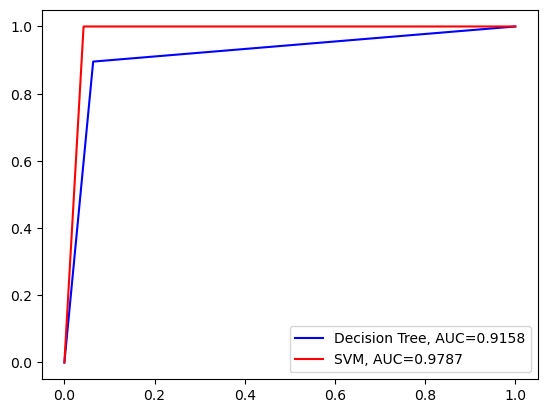

In [62]:
# Decision Tree curve 
fpr_dt, tpr_dt, _ = metrics.roc_curve(Y_test, dt_y_pred)
auc_dt = round(metrics.roc_auc_score(Y_test, dt_y_pred), 4)
plt.plot(fpr_dt, tpr_dt, label="Decision Tree, AUC=" + str(auc_dt), color='blue')

# SVM Curve
fpr_svm, tpr_svm, _ = metrics.roc_curve(Y_test, y_pred)
auc_svm = round(metrics.roc_auc_score(Y_test, y_pred), 4)
plt.plot(fpr_svm, tpr_svm, label="SVM, AUC=" + str(auc_svm), color='red')

plt.legend()


### Selecting model based on performance metrics of both Models

SVM is the Preferred Model for breast cancer dataset


1. In Picking Up model, i selected based on performance metrics of both, 

2. Based on confusion matrix we need to reduce TYPE I error and TYPE II error.

Less the false positive rate more the  better model,

And the accuracy of svm is much better than Decision Tree

we dont have any outliers for model to be overfit and underfit 


In Roc curve as svm model is almost equal to 1


Overall from all Observations 

#### SVM is good fit

Performance Metrics: SVM outperforms the Decision Tree in precision, recall, F1-score, and accuracy.

Type I Error Reduction: SVM minimizes false positives, crucial in medical diagnosis to avoid unnecessary treatments.

Robustness: SVM shows balanced performance, avoiding overfitting or underfitting.

ROC Curve: SVM's ROC curve is excellent, signifying strong discriminatory power.

In conclusion, SVM is the better choice for breast cancer diagnosis.

